# Final Model

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [167]:
alcohol_use = pd.read_csv('../../Platform/csv/Alcohol_use_disorders.csv')
drug_use = pd.read_csv('../../Platform/csv/Drug_use_disorders.csv')
violence = pd.read_csv('../../Platform/csv/Interpersonal_violence.csv')
self_harm = pd.read_csv('../../Platform/csv/Self-harm.csv')

# Exploratory Data Analysis

In [168]:
alcohol_use.head()

,Unnamed: 0,Alcohol use disorders,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,1,United States,NaN,"3.10 (2.90, 3.34)","2.90 (2.78, 3.18)","2.93 (2.83, 3.07)","2.91 (2.79, 3.04)","2.76 (2.65, 2.86)","2.87 (2.76, 2.96)","2.83 (2.71, 2.95)","2.85 (2.68, 3.00)","-8.12 (-21.14, 0.54)"
2,2,Alabama,1,"3.11 (2.86, 3.43)","3.06 (2.85, 3.35)","3.07 (2.90, 3.28)","2.98 (2.82, 3.15)","2.57 (2.41, 2.72)","2.58 (2.41, 2.75)","2.34 (2.17, 2.51)","2.28 (2.07, 2.49)","-26.67 (-37.77, -16.55)"
3,3,"Autauga County, Alabama",1001,"2.93 (2.13, 4.05)","2.61 (1.98, 3.48)","2.59 (2.00, 3.38)","2.19 (1.73, 2.76)","1.83 (1.41, 2.34)","1.82 (1.28, 2.44)","1.37 (0.93, 1.91)","1.45 (0.90, 2.11)","-50.52 (-72.95, -17.98)"
4,4,"Baldwin County, Alabama",1003,"2.65 (2.00, 3.44)","2.71 (2.16, 3.40)","3.05 (2.50, 3.70)","2.80 (2.29, 3.36)","2.47 (2.02, 2.97)","3.10 (2.45, 3.84)","2.69 (2.06, 3.41)","2.53 (1.88, 3.36)","-4.62 (-33.89, 41.59)"


In [169]:
alcohol_use.tail()

,Unnamed: 0,Alcohol use disorders,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
3192,3192,"Uinta County, Wyoming",56041,"2.65 (1.88, 3.83)","2.89 (2.12, 3.97)","3.25 (2.51, 4.19)","3.80 (2.96, 4.77)","4.09 (3.14, 5.06)","4.56 (3.33, 5.82)","4.78 (3.38, 6.51)","5.43 (3.72, 7.42)","105.09 (22.72, 239.90)"
3193,3193,"Washakie County, Wyoming",56043,"3.93 (2.70, 5.50)","4.07 (2.89, 5.57)","4.80 (3.61, 6.28)","4.83 (3.67, 6.29)","5.27 (4.08, 6.68)","5.86 (4.54, 7.41)","6.24 (4.71, 7.93)","7.05 (5.15, 9.18)","79.49 (13.60, 184.59)"
3194,3194,"Weston County, Wyoming",56045,"2.38 (1.61, 3.47)","2.12 (1.49, 2.91)","2.16 (1.53, 3.03)","2.22 (1.60, 2.98)","2.19 (1.59, 2.89)","2.25 (1.57, 3.08)","2.08 (1.38, 2.92)","2.11 (1.34, 3.05)","-11.26 (-48.87, 41.75)"
3195,3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196,3196,*Age-standardized mortality rate for both sexe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We don't need first and last 2 rows, so remove them (NaN values, and not counties)
- Also remove id column (redundant) and FIPS (simply an ID given to the county)

In [170]:
# remove first and last 2 rows, and id
def removeRowsCols(df):
    df.columns = df.iloc[0]
    df = df[2:-2]
#     cols_to_drop = [0, 'FIPS']
    cols_to_drop = [0]
    df = df.drop(cols_to_drop, axis=1);
    return df
alcohol_use = removeRowsCols(alcohol_use)
drug_use = removeRowsCols(drug_use)
violence = removeRowsCols(violence)
self_harm = removeRowsCols(self_harm)

In [171]:
alcohol_use.tail()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
3190,"Sweetwater County, Wyoming",56037,"2.72 (1.98, 3.65)","2.58 (1.99, 3.32)","3.26 (2.60, 4.11)","3.77 (2.97, 4.63)","3.80 (3.06, 4.71)","4.07 (3.16, 5.01)","4.11 (3.02, 5.22)","4.50 (3.28, 5.87)","65.57 (8.00, 147.56)"
3191,"Teton County, Wyoming",56039,"1.42 (1.04, 1.94)","1.33 (1.01, 1.75)","1.45 (1.12, 1.86)","1.52 (1.17, 1.92)","1.55 (1.20, 1.99)","1.72 (1.32, 2.21)","1.78 (1.34, 2.32)","1.75 (1.27, 2.34)","23.05 (-20.26, 83.32)"
3192,"Uinta County, Wyoming",56041,"2.65 (1.88, 3.83)","2.89 (2.12, 3.97)","3.25 (2.51, 4.19)","3.80 (2.96, 4.77)","4.09 (3.14, 5.06)","4.56 (3.33, 5.82)","4.78 (3.38, 6.51)","5.43 (3.72, 7.42)","105.09 (22.72, 239.90)"
3193,"Washakie County, Wyoming",56043,"3.93 (2.70, 5.50)","4.07 (2.89, 5.57)","4.80 (3.61, 6.28)","4.83 (3.67, 6.29)","5.27 (4.08, 6.68)","5.86 (4.54, 7.41)","6.24 (4.71, 7.93)","7.05 (5.15, 9.18)","79.49 (13.60, 184.59)"
3194,"Weston County, Wyoming",56045,"2.38 (1.61, 3.47)","2.12 (1.49, 2.91)","2.16 (1.53, 3.03)","2.22 (1.60, 2.98)","2.19 (1.59, 2.89)","2.25 (1.57, 3.08)","2.08 (1.38, 2.92)","2.11 (1.34, 3.05)","-11.26 (-48.87, 41.75)"


In [172]:
alcohol_use.dtypes

0
Location                                 object
FIPS                                     object
Mortality Rate, 1980*                    object
Mortality Rate, 1985*                    object
Mortality Rate, 1990*                    object
Mortality Rate, 1995*                    object
Mortality Rate, 2000*                    object
Mortality Rate, 2005*                    object
Mortality Rate, 2010*                    object
Mortality Rate, 2014*                    object
% Change in Mortality Rate, 1980-2014    object
dtype: object

these are all objects, which we definitely need to convert to numbers for our model to train!

In [173]:
alcohol_use.isnull().sum()

0
Location                                 0
FIPS                                     0
Mortality Rate, 1980*                    0
Mortality Rate, 1985*                    0
Mortality Rate, 1990*                    0
Mortality Rate, 1995*                    0
Mortality Rate, 2000*                    0
Mortality Rate, 2005*                    0
Mortality Rate, 2010*                    0
Mortality Rate, 2014*                    0
% Change in Mortality Rate, 1980-2014    0
dtype: int64

No null/missing values, which is good for us!

# TODO
- Add column for state (and encode it)

In [174]:
def preprocess(df, statistic):
    renamed_columns = ['Location', 'id', '1980' + statistic, '1985' + statistic, '1990'+ statistic, '1995'+ statistic, '2000'+ statistic, '2005'+ statistic, '2010'+ statistic, '2014'+ statistic, 'change'+ statistic]
    df.columns = renamed_columns
    # get rid of 95% confidence interval values 
    for col in range(2, len(df.columns)):
        df[df.columns[col]] = df[df.columns[col]].apply(lambda string: float(string.split(' ')[0]))
    # add state as new column
#     states = []
#     for value in df['Location']:
#         if "," in value:
#             states.append(value.split(",", 1)[1])
#         else:
#             states.append(value)
#     df['State'] = states
    
preprocess(alcohol_use, '_a')
preprocess(drug_use, '_d')
preprocess(violence, '_v')
preprocess(self_harm, '_s')

Now, we will merge the 4 dataframes into 1, combining all 4 metrics of alcohol use, drug use, violence, and self harm.

In [175]:
dfs = [alcohol_use, drug_use, violence, self_harm]
df_merged = reduce(lambda  left,right: pd.merge(left,right, on=['Location', 'id'], how='left'), dfs)
df_merged

,Location,id,1980_a,1985_a,1990_a,1995_a,2000_a,2005_a,2010_a,2014_a,...,change_v,1980_s,1985_s,1990_s,1995_s,2000_s,2005_s,2010_s,2014_s,change_s
0,Alabama,1,3.11,3.06,3.07,2.98,2.57,2.58,2.34,2.28,...,-36.70,14.67,14.63,14.98,15.13,14.39,15.43,16.13,16.72,14.02
1,"Autauga County, Alabama",1001,2.93,2.61,2.59,2.19,1.83,1.82,1.37,1.45,...,-37.77,15.53,16.68,16.71,16.19,15.56,16.52,18.03,18.19,17.15
2,"Baldwin County, Alabama",1003,2.65,2.71,3.05,2.80,2.47,3.10,2.69,2.53,...,-51.20,14.29,16.55,16.30,16.01,15.90,16.90,17.75,18.51,29.52
3,"Barbour County, Alabama",1005,3.91,3.11,2.96,3.02,2.74,2.81,2.57,2.72,...,-39.04,16.08,16.00,16.11,15.48,14.38,15.15,15.64,16.20,0.73
4,"Bibb County, Alabama",1007,2.21,2.18,2.35,2.24,1.87,1.65,1.36,1.22,...,-27.59,13.98,14.59,15.25,15.89,15.09,16.57,18.12,19.95,42.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,"Sweetwater County, Wyoming",56037,2.72,2.58,3.26,3.77,3.80,4.07,4.11,4.50,...,-35.38,23.51,22.71,23.58,24.33,22.49,24.41,25.86,26.40,12.29
3189,"Teton County, Wyoming",56039,1.42,1.33,1.45,1.52,1.55,1.72,1.78,1.75,...,-36.46,16.98,16.55,16.57,15.94,14.16,14.02,13.95,14.73,-13.24
3190,"Uinta County, Wyoming",56041,2.65,2.89,3.25,3.80,4.09,4.56,4.78,5.43,...,-25.84,20.03,20.80,21.17,22.12,20.97,22.76,25.31,26.61,32.84
3191,"Washakie County, Wyoming",56043,3.93,4.07,4.80,4.83,5.27,5.86,6.24,7.05,...,-18.64,17.96,18.07,18.24,17.96,16.53,17.06,17.88,18.92,5.31


We will add another feature, which is the average change for all 4 metrics:

In [176]:
df_merged['avg_change'] = (df_merged['change_a'] + df_merged['change_d'] + df_merged['change_v'] + df_merged['change_s']) / 4

Now, we check the distribution of the "average change" feature to see if our data is skewed.

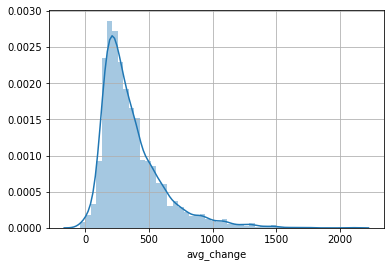

In [177]:
# Distribution of Average Change Feature
ax = sns.distplot(df_merged.avg_change, kde=True )
ax.grid()

Data is definitely right skewed, with the right tail being very long. We will keep this in mind if our model training is not accurate.

In [178]:
# creating 0-9 scale for classification
num_bins = 9
classification, bins = pd.qcut(df_merged.avg_change, q=num_bins, labels=False, retbins=True)
classification

0       6
1       3
2       6
3       1
4       7
       ..
3188    7
3189    3
3190    8
3191    5
3192    3
Name: avg_change, Length: 3193, dtype: int64

In [179]:
# checking the cutoffs for our classification
pd.DataFrame(np.round(bins), columns=["Upper Bound"]).rename_axis(index='Bin')

,Upper Bound
Bin,
0,-42.0
1,151.0
2,191.0
3,230.0
4,272.0
5,326.0
6,392.0
7,491.0
8,638.0


In [180]:
# Mapping will be used when we export data to CSV
class_to_index = {'Poor': 0, 'Adequate': 1, 'Good': 3}
index_to_class = {0: 'Poor', 1: 'Adequate', 3: 'Good'}

In [181]:
# Adding classification feature to predict
df_merged['classification'] = classification
df_merged

,Location,id,1980_a,1985_a,1990_a,1995_a,2000_a,2005_a,2010_a,2014_a,...,1985_s,1990_s,1995_s,2000_s,2005_s,2010_s,2014_s,change_s,avg_change,classification
0,Alabama,1,3.11,3.06,3.07,2.98,2.57,2.58,2.34,2.28,...,14.63,14.98,15.13,14.39,15.43,16.13,16.72,14.02,424.9125,6
1,"Autauga County, Alabama",1001,2.93,2.61,2.59,2.19,1.83,1.82,1.37,1.45,...,16.68,16.71,16.19,15.56,16.52,18.03,18.19,17.15,231.9175,3
2,"Baldwin County, Alabama",1003,2.65,2.71,3.05,2.80,2.47,3.10,2.69,2.53,...,16.55,16.30,16.01,15.90,16.90,17.75,18.51,29.52,442.3925,6
3,"Barbour County, Alabama",1005,3.91,3.11,2.96,3.02,2.74,2.81,2.57,2.72,...,16.00,16.11,15.48,14.38,15.15,15.64,16.20,0.73,163.3400,1
4,"Bibb County, Alabama",1007,2.21,2.18,2.35,2.24,1.87,1.65,1.36,1.22,...,14.59,15.25,15.89,15.09,16.57,18.12,19.95,42.74,578.6850,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,"Sweetwater County, Wyoming",56037,2.72,2.58,3.26,3.77,3.80,4.07,4.11,4.50,...,22.71,23.58,24.33,22.49,24.41,25.86,26.40,12.29,564.2475,7
3189,"Teton County, Wyoming",56039,1.42,1.33,1.45,1.52,1.55,1.72,1.78,1.75,...,16.55,16.57,15.94,14.16,14.02,13.95,14.73,-13.24,235.6575,3
3190,"Uinta County, Wyoming",56041,2.65,2.89,3.25,3.80,4.09,4.56,4.78,5.43,...,20.80,21.17,22.12,20.97,22.76,25.31,26.61,32.84,885.6975,8
3191,"Washakie County, Wyoming",56043,3.93,4.07,4.80,4.83,5.27,5.86,6.24,7.05,...,18.07,18.24,17.96,16.53,17.06,17.88,18.92,5.31,382.6300,5


In [182]:
df_merged.classification.value_counts()

7    355
5    355
1    355
8    355
4    355
2    355
0    355
3    354
6    354
Name: classification, dtype: int64

We have successfully separated data into around 10 equal partitions!

In [183]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X = df_merged.drop(['classification', 'Location', 'id'], axis=1)
y = df_merged['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# TODO
Train your own classifier!

In [162]:
# import whatever model you use here!
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

xgclf = XGBClassifier(max_depth=5, learning_rate=0.13)
xgclf.fit(X_train, y_train)
xg_y_pred = xgclf.predict(X_test)

# TODO
Evaluate your model's performance!

In [163]:
# Some useful imports to get you started
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))
print("XGBoost Accuracy: ", accuracy_score(y_test, xg_y_pred))

Random Forest Accuracy:  0.9895635673624289
XGBoost Accuracy:  0.9981024667931688


In [187]:
to_csv = df_merged[['id','classification', ]].copy()
to_csv 

,id,classification
0,1,6
1,1001,3
2,1003,6
3,1005,1
4,1007,7
...,...,...
3188,56037,7
3189,56039,3
3190,56041,8
3191,56043,5


# Generating Results as a CSV

In [199]:
ints_df = to_csv.astype('int32')
to_csv = to_csv.loc[ints_df['id'] > 56]
# d3 doesn't like it when the FIPS ids are not lead with zeros 8)
to_csv['id'] = to_csv['id'].apply(lambda x: x.zfill(5))
to_csv.dtypes

id                object
classification     int64
dtype: object

In [200]:
to_csv

,id,classification
1,01001,3
2,01003,6
3,01005,1
4,01007,7
5,01009,8
...,...,...
3188,56037,7
3189,56039,3
3190,56041,8
3191,56043,5


In [201]:
to_csv.to_csv('./classifications.csv', index=False)